This notebook shows the TensorFlow Lite model conversion and inference processes for the **MIRNet** model as proposed by [Learning Enriched Features for Real Image Restoration and Enhancement](https://arxiv.org/pdf/2003.06792v2.pdf). This model is capable of enhancing low-light images upto a great extent. 

<p align="center">
<img src="https://github.com/soumik12345/MIRNet/raw/master/assets/lol_results.gif"</img><br>
<small><a href="https://github.com/soumik12345/MIRNet/blob/master/assets/lol_results.gif">Source</a></small>
</p>

Model training code and pre-trained weights are provided by **Soumik** through [this repository](https://github.com/soumik12345/MIRNet/). 

Access **Sayak's** notebooks  [here](https://github.com/sayakpaul/MIRNet-TFLite/). 

## Initial setup

In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 251 (delta 114), reused 166 (delta 45), pack-reused 0
Receiving objects: 100% (251/251), 28.13 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (114/114), done.
/content/MIRNet


In [2]:
!pip install -q wandb

     |████████████████████████████████| 1.7 MB 26.8 MB/s 
     |████████████████████████████████| 181 kB 65.6 MB/s 
     |████████████████████████████████| 144 kB 67.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [3]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.8.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download dataset and pre-trained weights

In [6]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='/content/drive/MyDrive/Image/low_light_weights_best.h5'
)
inferer.model.summary()

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL 



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_638 (Conv2D)            (None, None, None,   1792        ['input_2[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_639 (Conv2D)            (None, None, None,   36928       ['conv2d_638[0][0]']             
                                64)                                                         

In [7]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet/assets


In [14]:
IMAGE_LOC = '/content/test1.jpeg'

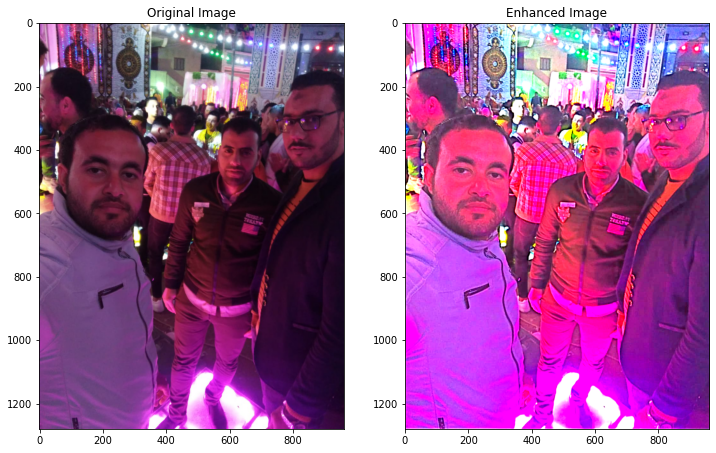

In [15]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)